# Plinko Board Simulation

## Introduction

Research question: How does the radius of the ball dropped for a plinko board effect how many times it hits the bottom wall and where?

## Equations Used:

- Momentum equation: $ P = m*v $, where $m$ is the mass of the object and $v$ is the velocity.
- Position update equation: $ r_f = r_i + v*\Delta t $ where $r_f$ and $r_i$ are the final and inital position respectively.
- Time update equation: $t_f = t_i + \Delta t $

## Objective:

Create a simulation of a non-traditional plinko board and create a histogram that will plot where the ball lands in the x-position.

## Assumptions

- Closed system.
- Energy/force is conserved.
- Non-traditional plinko board(ball will hit bottom wall and bounce back up instead of falling through).
- Ball will be dropped at a random location within a set range.

# Code

In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import random

<IPython.core.display.Javascript object>

In [2]:
def check_collisions():
    """Determine all pairs of colliding spheres in the global particles[] list. 
        
    """
    global rods
    
    crods = None #a list of rods to store and check collisions with ball
    

    for j in range(0,len(rods)): 
        d = mag(balls.pos - rods[j].pos)
        if d < Rball+Rrod:
            crods = rods[j]            
            print("collision")
    return crods

In [3]:
def ball_pos_y():
    """function to store for histogram
    """
    bally = []
    if ball.pos.y < -.5:
        bally.append([i])
        print(bally.append)
           
    return ball.pos.y

In [5]:
scene = canvas(title="Plinko Board")

#constants
m = 2000 #mass of ball in kg
Rrod = 0.005
Rball = 2*Rrod #radius of ball in m
L = 2 #length of box in m
thick = L/100 #thickness of box wall in m
g = -9.8 #gravity
Fnet = vec(0,g*m,0)#net force
ballx=[]
#visual
Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Bwall = box(pos = vec(0, -0.5, 0), size = vec(L, thick, L), color=color.white)

#time and timsteps
t = 0
dt = 0.01

scene.pause()
#ball constants
ball = sphere(pos = vec(random.uniform(0.01,0.09),1,0), radius = Rball, color = color.cyan, make_trail=True, retain=20, trail_radius=0.3*Rball)    
ball.v = vec(0,0,0)
ball.p = ball.v*m
print("starting position on axis:",ball.pos.x) # inital position of where ball starts on x axis since it is dropped between a range of 0.01-0.09
#rod loop
h = 5*Rrod

# L = 2
Ncols = 40
dx = L/Ncols
Nrows = 20
dy = dx

rods = []

y = Nrows/2*dy
for i in range(Nrows):
    x = -L/2
    if i % 2 == 0:
        x = x + dx/2
    for j in range(Ncols):
        rod = cylinder(pos=vec(x,y,0), axis=h*vec(0,0,1), radius = Rrod, color=color.yellow)
        rods.append(rod)
        x = x + dx
    y = y - dy
#print(y)

#number of time steps for the loop
while t < 15:
    rate(100) #sets number of loops per second in order to slow down or speed up visualization
    ball.p = ball.p + (Fnet*dt)
    ball.v = ball.p/m
    ball.pos = ball.pos + ball.v*dt
    
  
 #collisions
    #collisions with rod 
    for j in range(0,len(rods)): 
        d = mag(ball.pos - rods[j].pos)
        if d < Rball+Rrod:
            r = (ball.pos - rods[j].pos)
            ball.pos = ball.pos - ball.v*dt
            rhat = hat(r)
            vballrad = dot(ball.v,rhat)*rhat
            vballtan = ball.v - vballrad
            vballrad = -vballrad
            ball.v = vballtan + vballrad
            ball.p = ball.v * m
            ball.pos = ball.pos + ball.v*dt
            #print("colo")
    #collisions with walls
    if ball.pos.x > L/2:
        ball.v.x = - abs(ball.v.x)
        ball.p = m*ball.v
    elif ball.pos.x < -L/2:
        ball.v.x = abs(ball.v.x)
        ball.p = m*ball.v
    if ball.pos.y<-.5:
        ball.v.y = abs(ball.v.y)
        ball.p = m*ball.v
        ballx.append([ball.pos.x])#store positions in list
        #print(ball.pos.x)#validation 

    t = t + dt#update time in loop

<IPython.core.display.Javascript object>

starting position on axis: 0.04710756219976891


In [6]:
print("positions that ball hit in the bottom of wall(x position):",ballx)#validate its stored in list

positions that ball hit in the bottom of wall(x position): [[0.6084513119270979], [0.034018025425811386], [-0.981862243953864]]


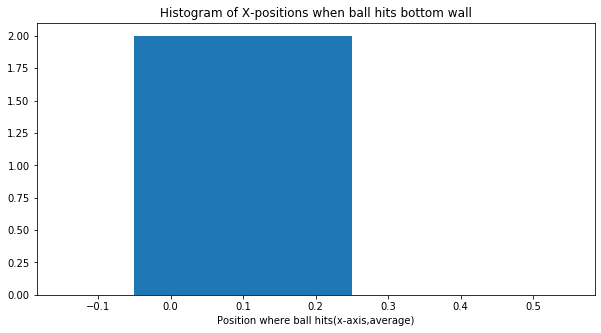

In [7]:
#histogram stuff
deltav = .3 # bin width for v histogram
nbins = 10 #number of bins
bin_edges = [int(i*deltav) for i in range(nbins)] #left side of bins

#store histogram
counts, binx = np.histogram([ballx], bins=bin_edges, range=None, normed=None, weights=None, density=None)
#create histogram
#calculate average position of each bin
centers = [] #store position
for i in range(len(binx)-1):
    vmiddle = (binx[i] + binx[i+1])/len(binx) #calculate average position
    centers.append(vmiddle)

#plot bar graph (histogram)
plt.figure(figsize=(10,5))
plt.bar(centers, counts, align='center', width=deltav)
plt.title('Histogram of X-positions when ball hits bottom wall')
plt.xlabel('Position where ball hits(x-axis,average)')
plt.show()

From the histogram above, it is clearly shown that the ball hits in between the given X-coordinates as it is an average of the entire list of x-positions of contact.

In [8]:
#making radius of ball same as radius of rods to see how it changes data 
scene = canvas(title="Plinko Board 2")

#constants
m = 2000 #mass of ball in kg
Rrod = 0.005
Rball = Rrod #radius of ball in m 
L = 2 #length of box in m
thick = L/100 #thickness of box wall in m
g = -9.8 #gravity
Fnet = vec(0,g*m,0)#net force
ballx2=[]
#visual
Lwall = box(pos = vec(-L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Rwall = box(pos = vec(L/2, 0, 0), size = vec(thick, L, L), color=color.white)
Bwall = box(pos = vec(0, -0.5, 0), size = vec(L, thick, L), color=color.white)

#time and timsteps
t = 0
dt = 0.01

scene.pause()
#ball constants
ball = sphere(pos = vec(random.uniform(0.01,0.09),1,0), radius = Rball, color = color.cyan, make_trail=True, retain=20, trail_radius=0.3*Rball)    
ball.v = vec(0,0,0)
ball.p = ball.v*m
print("starting position of ball at x-axis:", ball.pos.x)
#rod loop
h = 5*Rrod

# L = 2
Ncols = 40
dx = L/Ncols
Nrows = 20
dy = dx

rods = []

y = Nrows/2*dy
for i in range(Nrows):
    x = -L/2
    if i % 2 == 0:
        x = x + dx/2
    for j in range(Ncols):
        rod = cylinder(pos=vec(x,y,0), axis=h*vec(0,0,1), radius = Rrod, color=color.yellow)
        rods.append(rod)
        x = x + dx
    y = y - dy
#print(y)

#number of time steps for the loop
while t < 15:
    rate(100) #sets number of loops per second in order to slow down or speed up visualization
    ball.p = ball.p + (Fnet*dt)
    ball.v = ball.p/m
    ball.pos = ball.pos + ball.v*dt
    
  
 #collisions
    #collisions with rod 
    for j in range(0,len(rods)): 
        d = mag(ball.pos - rods[j].pos)
        if d < Rball+Rrod:
            r = (ball.pos - rods[j].pos)
            ball.pos = ball.pos - ball.v*dt
            rhat = hat(r)
            vballrad = dot(ball.v,rhat)*rhat
            vballtan = ball.v - vballrad
            vballrad = -vballrad
            ball.v = vballtan + vballrad
            ball.p = ball.v * m
            ball.pos = ball.pos + ball.v*dt
            #print("colo")
    #collisions with walls
    if ball.pos.x > L/2:
        ball.v.x = - abs(ball.v.x)
        ball.p = m*ball.v
    elif ball.pos.x < -L/2:
        ball.v.x = abs(ball.v.x)
        ball.p = m*ball.v
    if ball.pos.y<-.5:
        ball.v.y = abs(ball.v.y)
        ball.p = m*ball.v
        ballx2.append([ball.pos.x])#store positions in list
        #print(ball.pos.x)#validation 

    t = t + dt#update time in loop

<IPython.core.display.Javascript object>

starting position of ball at x-axis: 0.0455947984090806


The above code is changing the radius to equal the radius of the rods.

In [9]:
print(ballx2)

[[0.5997912681919455], [0.6705305961815142], [0.10691247341659356]]


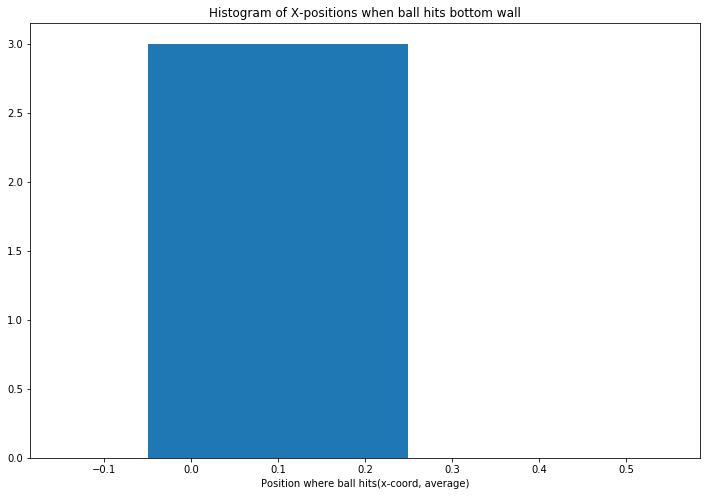

In [10]:
#histogram stuff
deltav = .3 # bin width for v histogram
nbins = 10 #number of bins
bin_edges = [int(i*deltav) for i in range(nbins)] #left side of bins

#store histogram
(counts, binx2) = np.histogram([ballx2], bins=bin_edges, range=None, normed=None, weights=None, density=None)

#create histogram
#calculate average position of each bin
centers = [] #store position
for i in range(len(binx2)-1):
    vmiddle = (binx2[i] + binx2[i+1])/len(binx2) #calculate average position
    centers.append(vmiddle)

#plot bar graph (histogram)
plt.figure(figsize=(12,8))
plt.bar(centers, counts , align='center', width=deltav)
plt.title('Histogram of X-positions when ball hits bottom wall')
plt.xlabel('Position where ball hits(x-coord, average)')
plt.show()

# Conclusion:

Making the ball the same size radius as the rods completly changes the amount of times it hits the bottom wall and also where it hits. The trajectory of the ball is much more sporadic and unpredictable. The reason for such a small loop is because the program will actually break if ran for too long of a time and the ball will fall under the wall and bounce back and fourth between the right and left wall. I beleive this could be a python error as it is overloading the loop so the boundries of the loop will fall out of place.